# PHASE-3

### Importing neccessary libraries

In [1]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA    


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading and Exploring the dataset
df = pd.read_csv(r'Booking_Data.csv',index_col=0)
df.head()

,sno,hotel_name,cities,location,number_of_reviews,user_ratings,star_rating,review_score,free_wifi,family_rooms,...,Bar,Heating,Lift,breakfast_cuisine1,breakfast_cuisine2,breakfast_cuisine3,room_type,single_bed,double_bed,Prices
0,1,NaN,Dubai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,Dubai,NaN,NaN,NaN,NaN,8.5,Yes,No,...,No,Yes,Yes,Top location: Highly rated by recent guests (9.2),Top location: Highly rated by recent guests (9.2),Top location: Highly rated by recent guests (9.2),Superior Apartment,Yes,Yes,"76,481"
2,3,NaN,Dubai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,Dubai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,Dubai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Rows and columns 
print('Number of rows:', df.shape[0]," ",'Number of columns:', df.shape[1]) 

Number of rows: 7602   Number of columns: 22


In [5]:
## Check all the attributes of the dataset
df.columns

Index(['sno', 'hotel_name', 'cities', 'location', 'number_of_reviews',
       'user_ratings', 'star_rating', 'review_score', 'free_wifi',
       'family_rooms', 'non_smoking_rooms', 'Restaurant', 'Bar', 'Heating',
       'Lift', 'breakfast_cuisine1', 'breakfast_cuisine2',
       'breakfast_cuisine3', 'room_type', 'single_bed', 'double_bed',
       'Prices'],
      dtype='object')

In [6]:
## Check the data types and non-null values of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7602 entries, 0 to 200
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sno                 7602 non-null   int64  
 1   hotel_name          5399 non-null   object 
 2   cities              7602 non-null   object 
 3   location            5442 non-null   object 
 4   number_of_reviews   4527 non-null   object 
 5   user_ratings        4228 non-null   float64
 6   star_rating         837 non-null    float64
 7   review_score        910 non-null    float64
 8   free_wifi           4386 non-null   object 
 9   family_rooms        4535 non-null   object 
 10  non_smoking_rooms   4532 non-null   object 
 11  Restaurant          5664 non-null   object 
 12  Bar                 5682 non-null   object 
 13  Heating             5686 non-null   object 
 14  Lift                5705 non-null   object 
 15  breakfast_cuisine1  3081 non-null   object 
 16  breakfast_cu

In [7]:
df.describe()

,sno,user_ratings,star_rating,review_score
count,7602.000000,4228.000000,837.000000,910.000000
mean,3801.500000,7.633444,3.575866,8.163187
std,2194.652706,1.431303,0.508813,1.036536
min,1.000000,1.000000,2.000000,2.500000
25%,1901.250000,7.075000,3.000000,7.500000
50%,3801.500000,7.900000,4.000000,8.300000
75%,5701.750000,8.500000,4.000000,8.900000
max,7602.000000,10.000000,4.000000,10.000000


In [8]:
df.isna().sum()

sno                      0
hotel_name            2203
cities                   0
location              2160
number_of_reviews     3075
user_ratings          3374
star_rating           6765
review_score          6692
free_wifi             3216
family_rooms          3067
non_smoking_rooms     3070
Restaurant            1938
Bar                   1920
Heating               1916
Lift                  1897
breakfast_cuisine1    4521
breakfast_cuisine2    4507
breakfast_cuisine3    4496
room_type             1825
single_bed            1809
double_bed            1787
Prices                1769
dtype: int64

### handling the nans

In [10]:
# dropping all the rows whose name are nan
df = df.dropna(subset=['hotel_name'])  

In [11]:
df['number_of_reviews']=df['number_of_reviews'].fillna(df['number_of_reviews'].mode()[0])

In [12]:
df['star_rating']=df['star_rating'].fillna(df['star_rating'].mode()[0])

In [13]:
df['user_ratings']=df['user_ratings'].fillna(df['user_ratings'].mean())

In [14]:
df['review_score']=df['review_score'].fillna(df['review_score'].mode()[0])

In [15]:
df['free_wifi']=df['free_wifi'].fillna(df['free_wifi'].mode()[0])

In [16]:
df['family_rooms']=df['family_rooms'].fillna(df['family_rooms'].mode()[0])

In [17]:
df['non_smoking_rooms']=df['non_smoking_rooms'].fillna(df['non_smoking_rooms'].mode()[0])

In [18]:
df['Restaurant']=df['Restaurant'].fillna(df['Restaurant'].mode()[0])

In [19]:
df['Bar']=df['Bar'].fillna(df['Bar'].mode()[0])

In [20]:
df['Heating']=df['Heating'].fillna(df['Heating'].mode()[0])

In [21]:
df['Heating']=df['Heating'].fillna(df['Heating'].mode()[0])

In [22]:
df['Lift']=df['Lift'].fillna(df['Lift'].mode()[0])

In [23]:
df['breakfast_cuisine1']=df['breakfast_cuisine1'].fillna(df['breakfast_cuisine1'].mode()[0])

In [24]:
df['breakfast_cuisine2']=df['breakfast_cuisine2'].fillna(df['breakfast_cuisine2'].mode()[0])

In [25]:
df['breakfast_cuisine3']=df['breakfast_cuisine3'].fillna(df['breakfast_cuisine3'].mode()[0])

In [26]:
df['room_type']=df['room_type'].fillna(df['room_type'].mode()[0])

In [27]:
df['single_bed']=df['single_bed'].fillna(df['single_bed'].mode()[0])

In [28]:
df['double_bed']=df['double_bed'].fillna(df['double_bed'].mode()[0])

In [29]:
df['Prices']=df['Prices'].fillna(df['Prices'].mode()[0])

In [30]:
df.isna().sum()

sno                    0
hotel_name             0
cities                 0
location              61
number_of_reviews      0
user_ratings           0
star_rating            0
review_score           0
free_wifi              0
family_rooms           0
non_smoking_rooms      0
Restaurant             0
Bar                    0
Heating                0
Lift                   0
breakfast_cuisine1     0
breakfast_cuisine2     0
breakfast_cuisine3     0
room_type              0
single_bed             0
double_bed             0
Prices                 0
dtype: int64

In [31]:
convert={'number_of_reviews':int,'Prices':int}

In [32]:
df['Prices']=df['Prices'].replace({',':''},regex=True)

In [33]:
df['number_of_reviews']=df['number_of_reviews'].replace({',':''},regex=True)

In [34]:
df=df.astype(convert)

In [35]:
df.describe()

,sno,number_of_reviews,user_ratings,star_rating,review_score,Prices
count,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000,5399.000000
mean,3859.235784,688.536951,7.626683,3.937766,8.024579,15287.339137
std,2119.779628,1468.740219,1.252409,0.246160,0.424816,18838.744345
min,6.000000,1.000000,1.000000,2.000000,2.500000,417.000000
25%,2084.500000,2.000000,7.400000,4.000000,8.000000,5237.000000
50%,3791.000000,55.000000,7.626683,4.000000,8.000000,11593.000000
75%,5686.500000,761.500000,8.300000,4.000000,8.000000,19237.000000
max,7602.000000,28872.000000,10.000000,4.000000,10.000000,555079.000000


In [36]:
df=df.reset_index()

### Dropping unneccsary columns

In [38]:
df=df.drop(['sno','location','index'],axis=1)

In [39]:
df

,hotel_name,cities,number_of_reviews,user_ratings,star_rating,review_score,free_wifi,family_rooms,non_smoking_rooms,Restaurant,Bar,Heating,Lift,breakfast_cuisine1,breakfast_cuisine2,breakfast_cuisine3,room_type,single_bed,double_bed,Prices
0,Anantara Residences Palm Jumeirah,Dubai,1,7.626683,4.0,8.0,No,No,Yes,Yes,Yes,Yes,Yes,City view,City view,City view,Apartment with Sea View,No,Yes,68927
1,Marina Metro Upgraded Furnished Studio by EasyGo,Dubai,1,8.000000,4.0,8.5,Yes,No,Yes,No,No,No,Yes,Top location: Highly rated by recent guests (1...,Top location: Highly rated by recent guests (1...,Top location: Highly rated by recent guests (1...,Studio,No,Yes,30949
2,SuperHost - Stylish Apartment Facing Creek Har...,Dubai,1,9.000000,4.0,10.0,Yes,No,Yes,No,No,No,Yes,Top location: Highly rated by recent guests (1...,Top location: Highly rated by recent guests (1...,Top location: Highly rated by recent guests (1...,One-Bedroom Apartment,No,Yes,33386
3,"Silkhaus gorgeous 1BDR home with Canal views, ...",Dubai,1,7.626683,4.0,8.0,Yes,No,No,No,No,No,Yes,City view,City view,City view,Apartment,No,Yes,32241
4,October Big Offer I Close to Dubai Mall,Dubai,1,7.626683,4.0,8.1,Yes,Yes,Yes,No,No,No,Yes,City view,City view,City view,Studio Apartment,No,Yes,37864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,The Only Backpacker's Inn,Toronto,882,7.800000,4.0,8.0,Yes,No,Yes,No,Yes,Yes,No,City view,City view,City view,Bed in 6-Bed Mixed Dormitory Room with Shared ...,Yes,No,3751
5395,Time Capsule - Value Inn,Toronto,66,4.800000,4.0,8.0,Yes,No,Yes,No,No,No,No,City view,City view,City view,Superior Single Room with Lake View,Yes,No,5553
5396,Quiet Room by Smartying York University,Toronto,309,7.300000,4.0,8.0,Yes,No,Yes,No,No,Yes,No,Garden view,Garden view,Garden view,Economy Double Room,No,Yes,7774
5397,Bright Room by Smartying York University,Toronto,245,7.600000,4.0,8.0,Yes,No,Yes,No,Yes,Yes,No,Quiet street view,Quiet street view,Quiet street view,Budget Double Room,No,Yes,7786


In [40]:
# Dropping more columns because the have so much uniques values
df=df.drop(['breakfast_cuisine1','breakfast_cuisine2','breakfast_cuisine3','room_type'],axis=1)

In [41]:
df=df.drop(['hotel_name'],axis=1)

In [42]:
df

,cities,number_of_reviews,user_ratings,star_rating,review_score,free_wifi,family_rooms,non_smoking_rooms,Restaurant,Bar,Heating,Lift,single_bed,double_bed,Prices
0,Dubai,1,7.626683,4.0,8.0,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,68927
1,Dubai,1,8.000000,4.0,8.5,Yes,No,Yes,No,No,No,Yes,No,Yes,30949
2,Dubai,1,9.000000,4.0,10.0,Yes,No,Yes,No,No,No,Yes,No,Yes,33386
3,Dubai,1,7.626683,4.0,8.0,Yes,No,No,No,No,No,Yes,No,Yes,32241
4,Dubai,1,7.626683,4.0,8.1,Yes,Yes,Yes,No,No,No,Yes,No,Yes,37864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,Toronto,882,7.800000,4.0,8.0,Yes,No,Yes,No,Yes,Yes,No,Yes,No,3751
5395,Toronto,66,4.800000,4.0,8.0,Yes,No,Yes,No,No,No,No,Yes,No,5553
5396,Toronto,309,7.300000,4.0,8.0,Yes,No,Yes,No,No,Yes,No,No,Yes,7774
5397,Toronto,245,7.600000,4.0,8.0,Yes,No,Yes,No,Yes,Yes,No,No,Yes,7786


In [43]:
from sklearn.preprocessing import LabelEncoder


In [44]:

df=df.apply(LabelEncoder().fit_transform)

In [45]:
df

,cities,number_of_reviews,user_ratings,star_rating,review_score,free_wifi,family_rooms,non_smoking_rooms,Restaurant,Bar,Heating,Lift,single_bed,double_bed,Prices
0,3,0,59,2,28,0,0,1,1,1,1,1,0,1,3125
1,3,0,63,2,33,1,0,1,0,0,0,1,0,1,2740
2,3,0,73,2,48,1,0,1,0,0,0,1,0,1,2800
3,3,0,59,2,28,1,0,0,0,0,0,1,0,1,2777
4,3,0,59,2,29,1,1,1,0,0,0,1,0,1,2890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,11,669,61,2,28,1,0,1,0,1,1,0,1,0,597
5395,11,65,30,2,28,1,0,1,0,0,0,0,1,0,851
5396,11,285,55,2,28,1,0,1,0,0,1,0,0,1,1134
5397,11,232,58,2,28,1,0,1,0,1,1,0,0,1,1135


<Axes: >

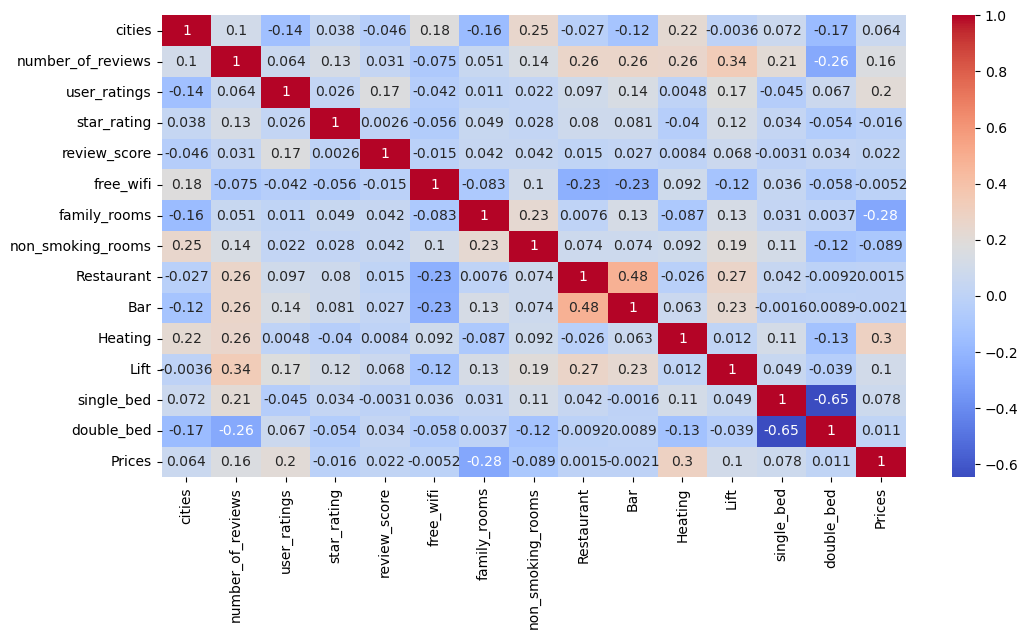

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# EDA

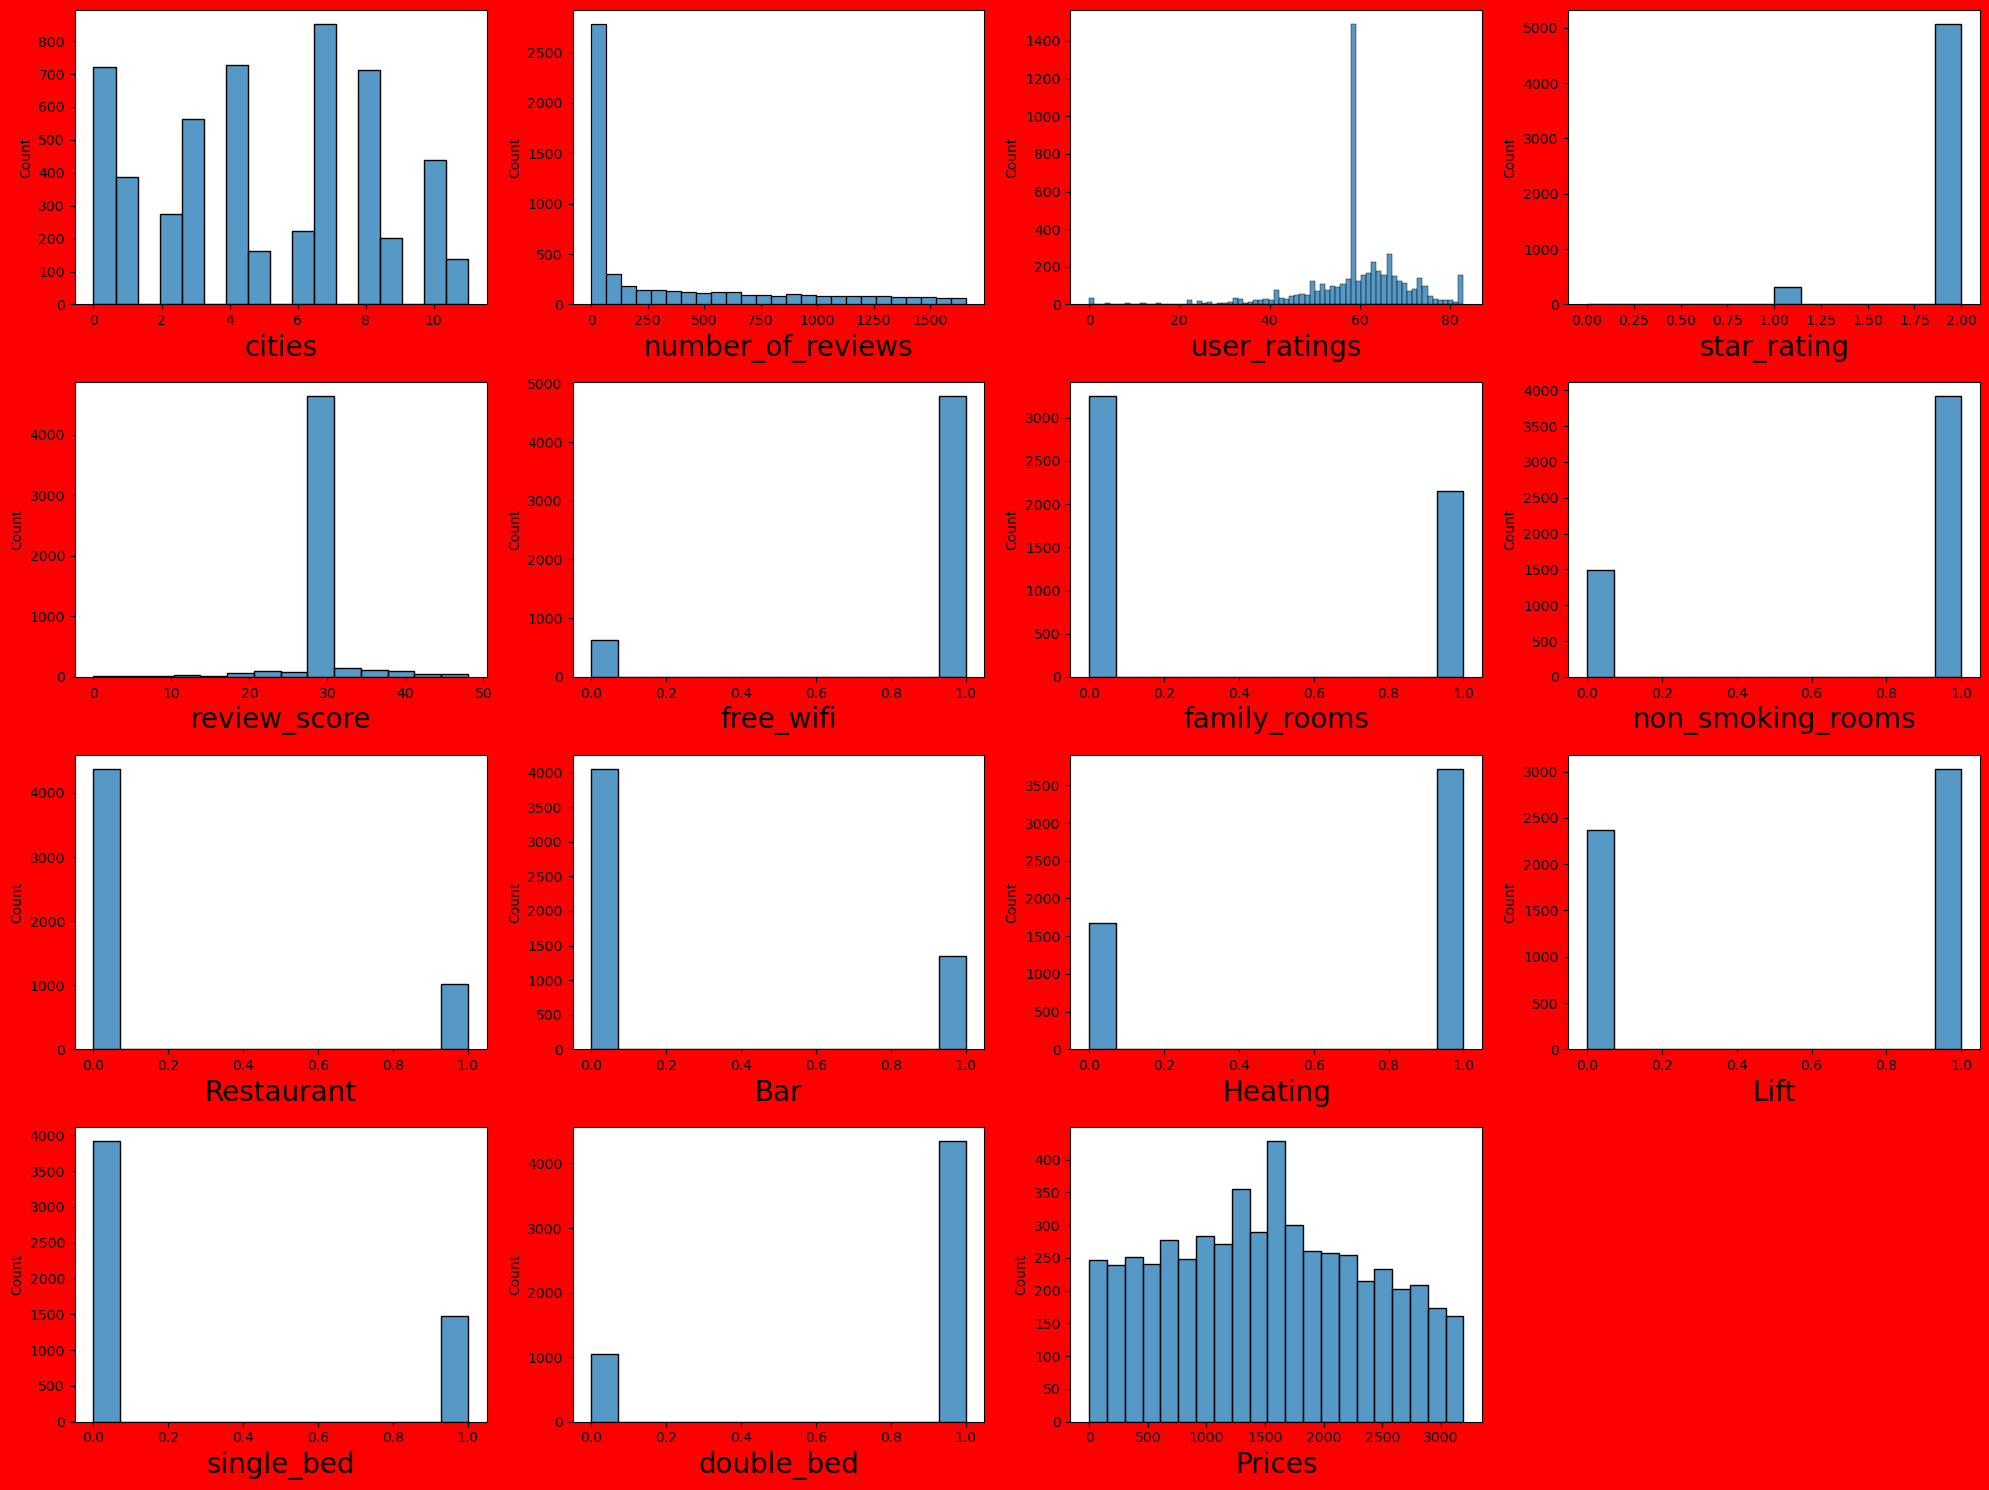

In [47]:
# Lets see how data is distributed for every column
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in df :
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Univariate Analysis

<Axes: xlabel='Prices', ylabel='Density'>

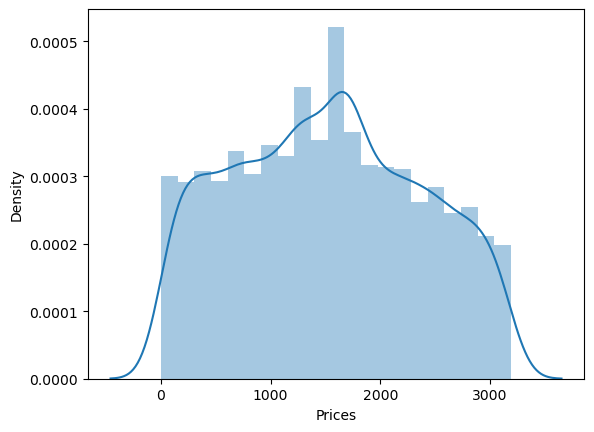

In [48]:
# Price Distribution
sns.distplot(df.Prices)



<Axes: xlabel='review_score', ylabel='Density'>

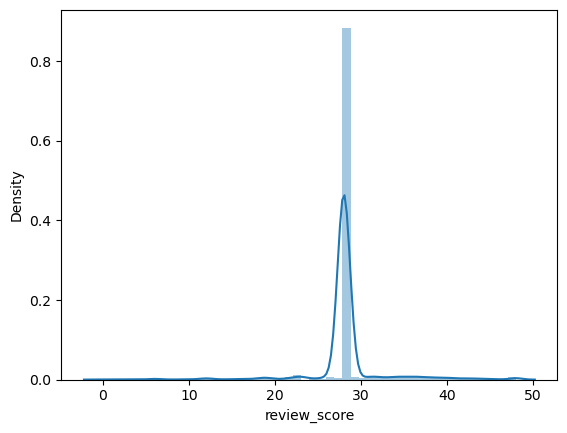

In [49]:
sns.distplot(df.review_score)

<Axes: xlabel='cities', ylabel='count'>

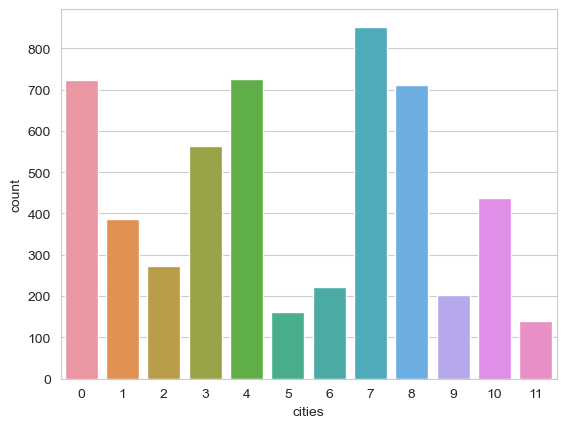

In [50]:
# Cities
sns.set_style("whitegrid")
sns.countplot(x="cities", data=df)

### Bivariate

<Axes: xlabel='cities', ylabel='Prices'>

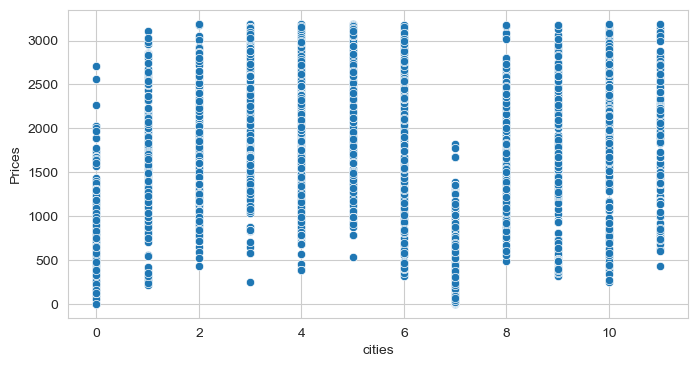

In [51]:
#Cities vs Prices
plt.figure(figsize=(8,4))
sns.scatterplot(x='cities',y='Prices',data=df)

<Axes: xlabel='cities', ylabel='review_score'>

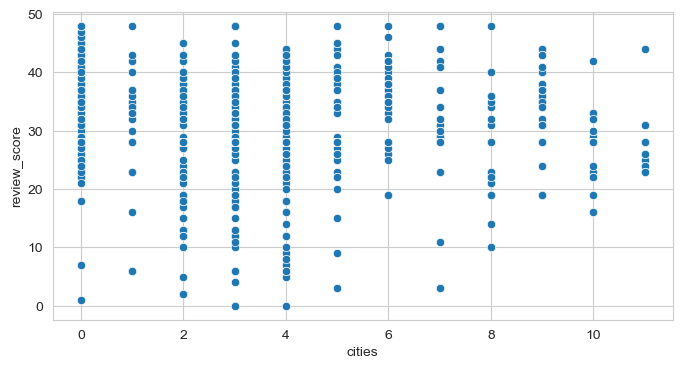

In [52]:
# Cities vs review score
plt.figure(figsize=(8,4))
sns.scatterplot(x='cities',y='review_score',data=df)

<Axes: xlabel='number_of_reviews', ylabel='review_score'>

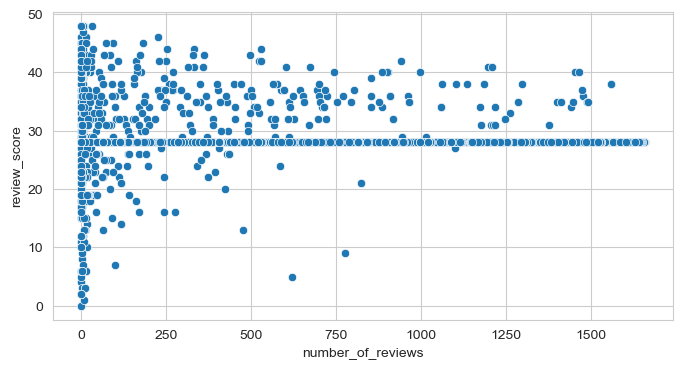

In [53]:
# Number of reviews vs revirew score
plt.figure(figsize=(8,4))
sns.scatterplot(x='number_of_reviews',y='review_score',data=df)

<Axes: xlabel='number_of_reviews', ylabel='Prices'>

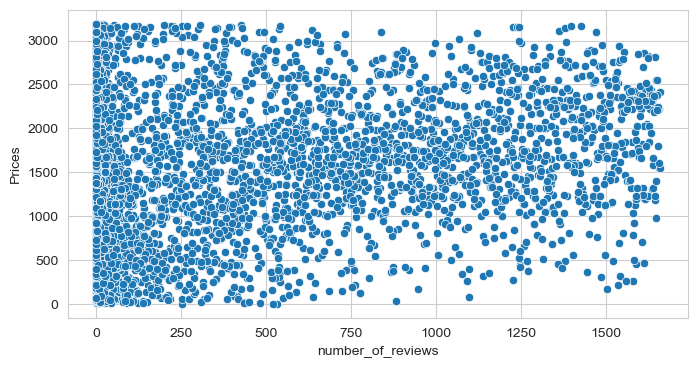

In [54]:
# Number of reviews vs Prices
plt.figure(figsize=(8,4))
sns.scatterplot(x='number_of_reviews',y='Prices',data=df)

<Axes: xlabel='star_rating', ylabel='review_score'>

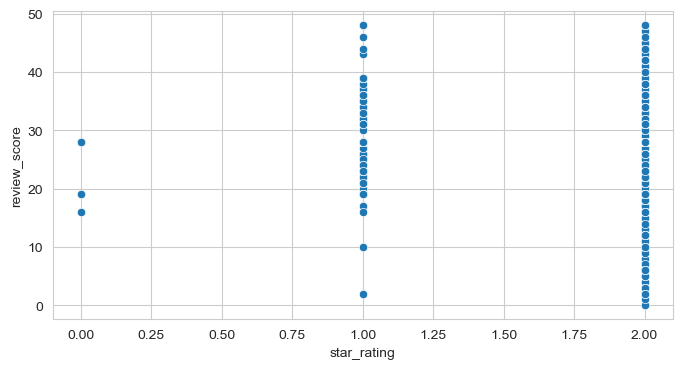

In [55]:
# Star ratings vs revirew score
plt.figure(figsize=(8,4))
sns.scatterplot(x='star_rating',y='review_score',data=df)

<Axes: xlabel='star_rating', ylabel='Prices'>

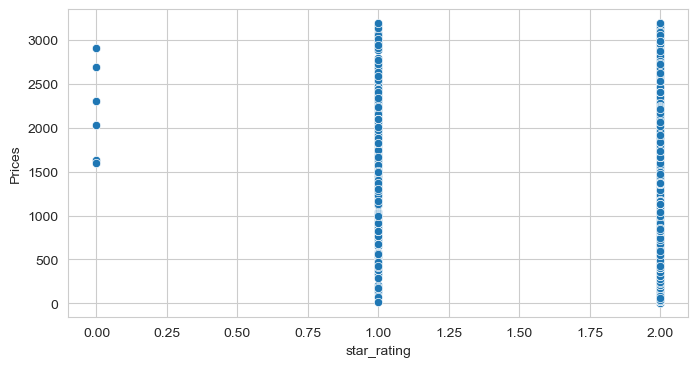

In [56]:
# Star rating vs Prices
plt.figure(figsize=(8,4))
sns.scatterplot(x='star_rating',y='Prices',data=df)

<Axes: xlabel='user_ratings', ylabel='Prices'>

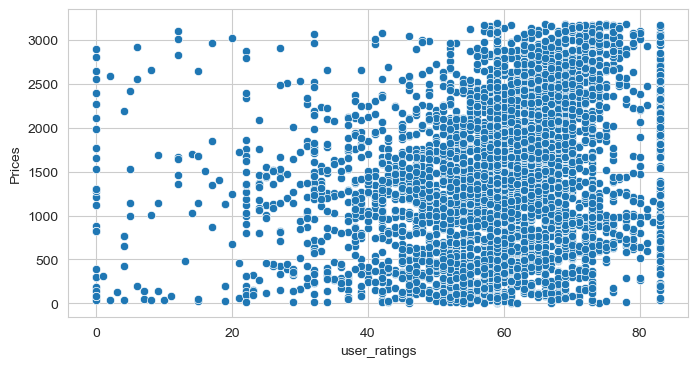

In [57]:
# User ratings vs Prices
plt.figure(figsize=(8,4))
sns.scatterplot(x='user_ratings',y='Prices',data=df)

<Axes: xlabel='user_ratings', ylabel='review_score'>

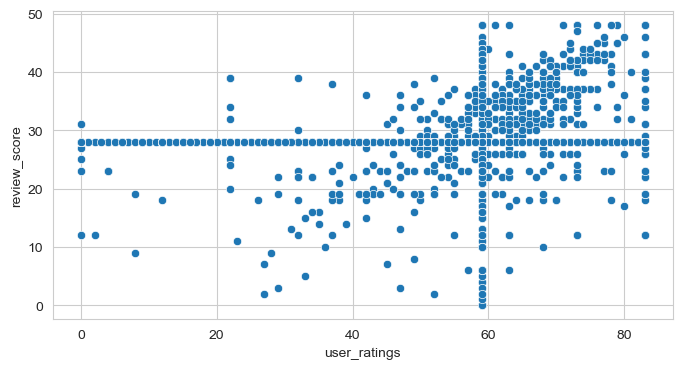

In [58]:
# User ratings vs review score
plt.figure(figsize=(8,4))
sns.scatterplot(x='user_ratings',y='review_score',data=df)

### Multivariate Analysis

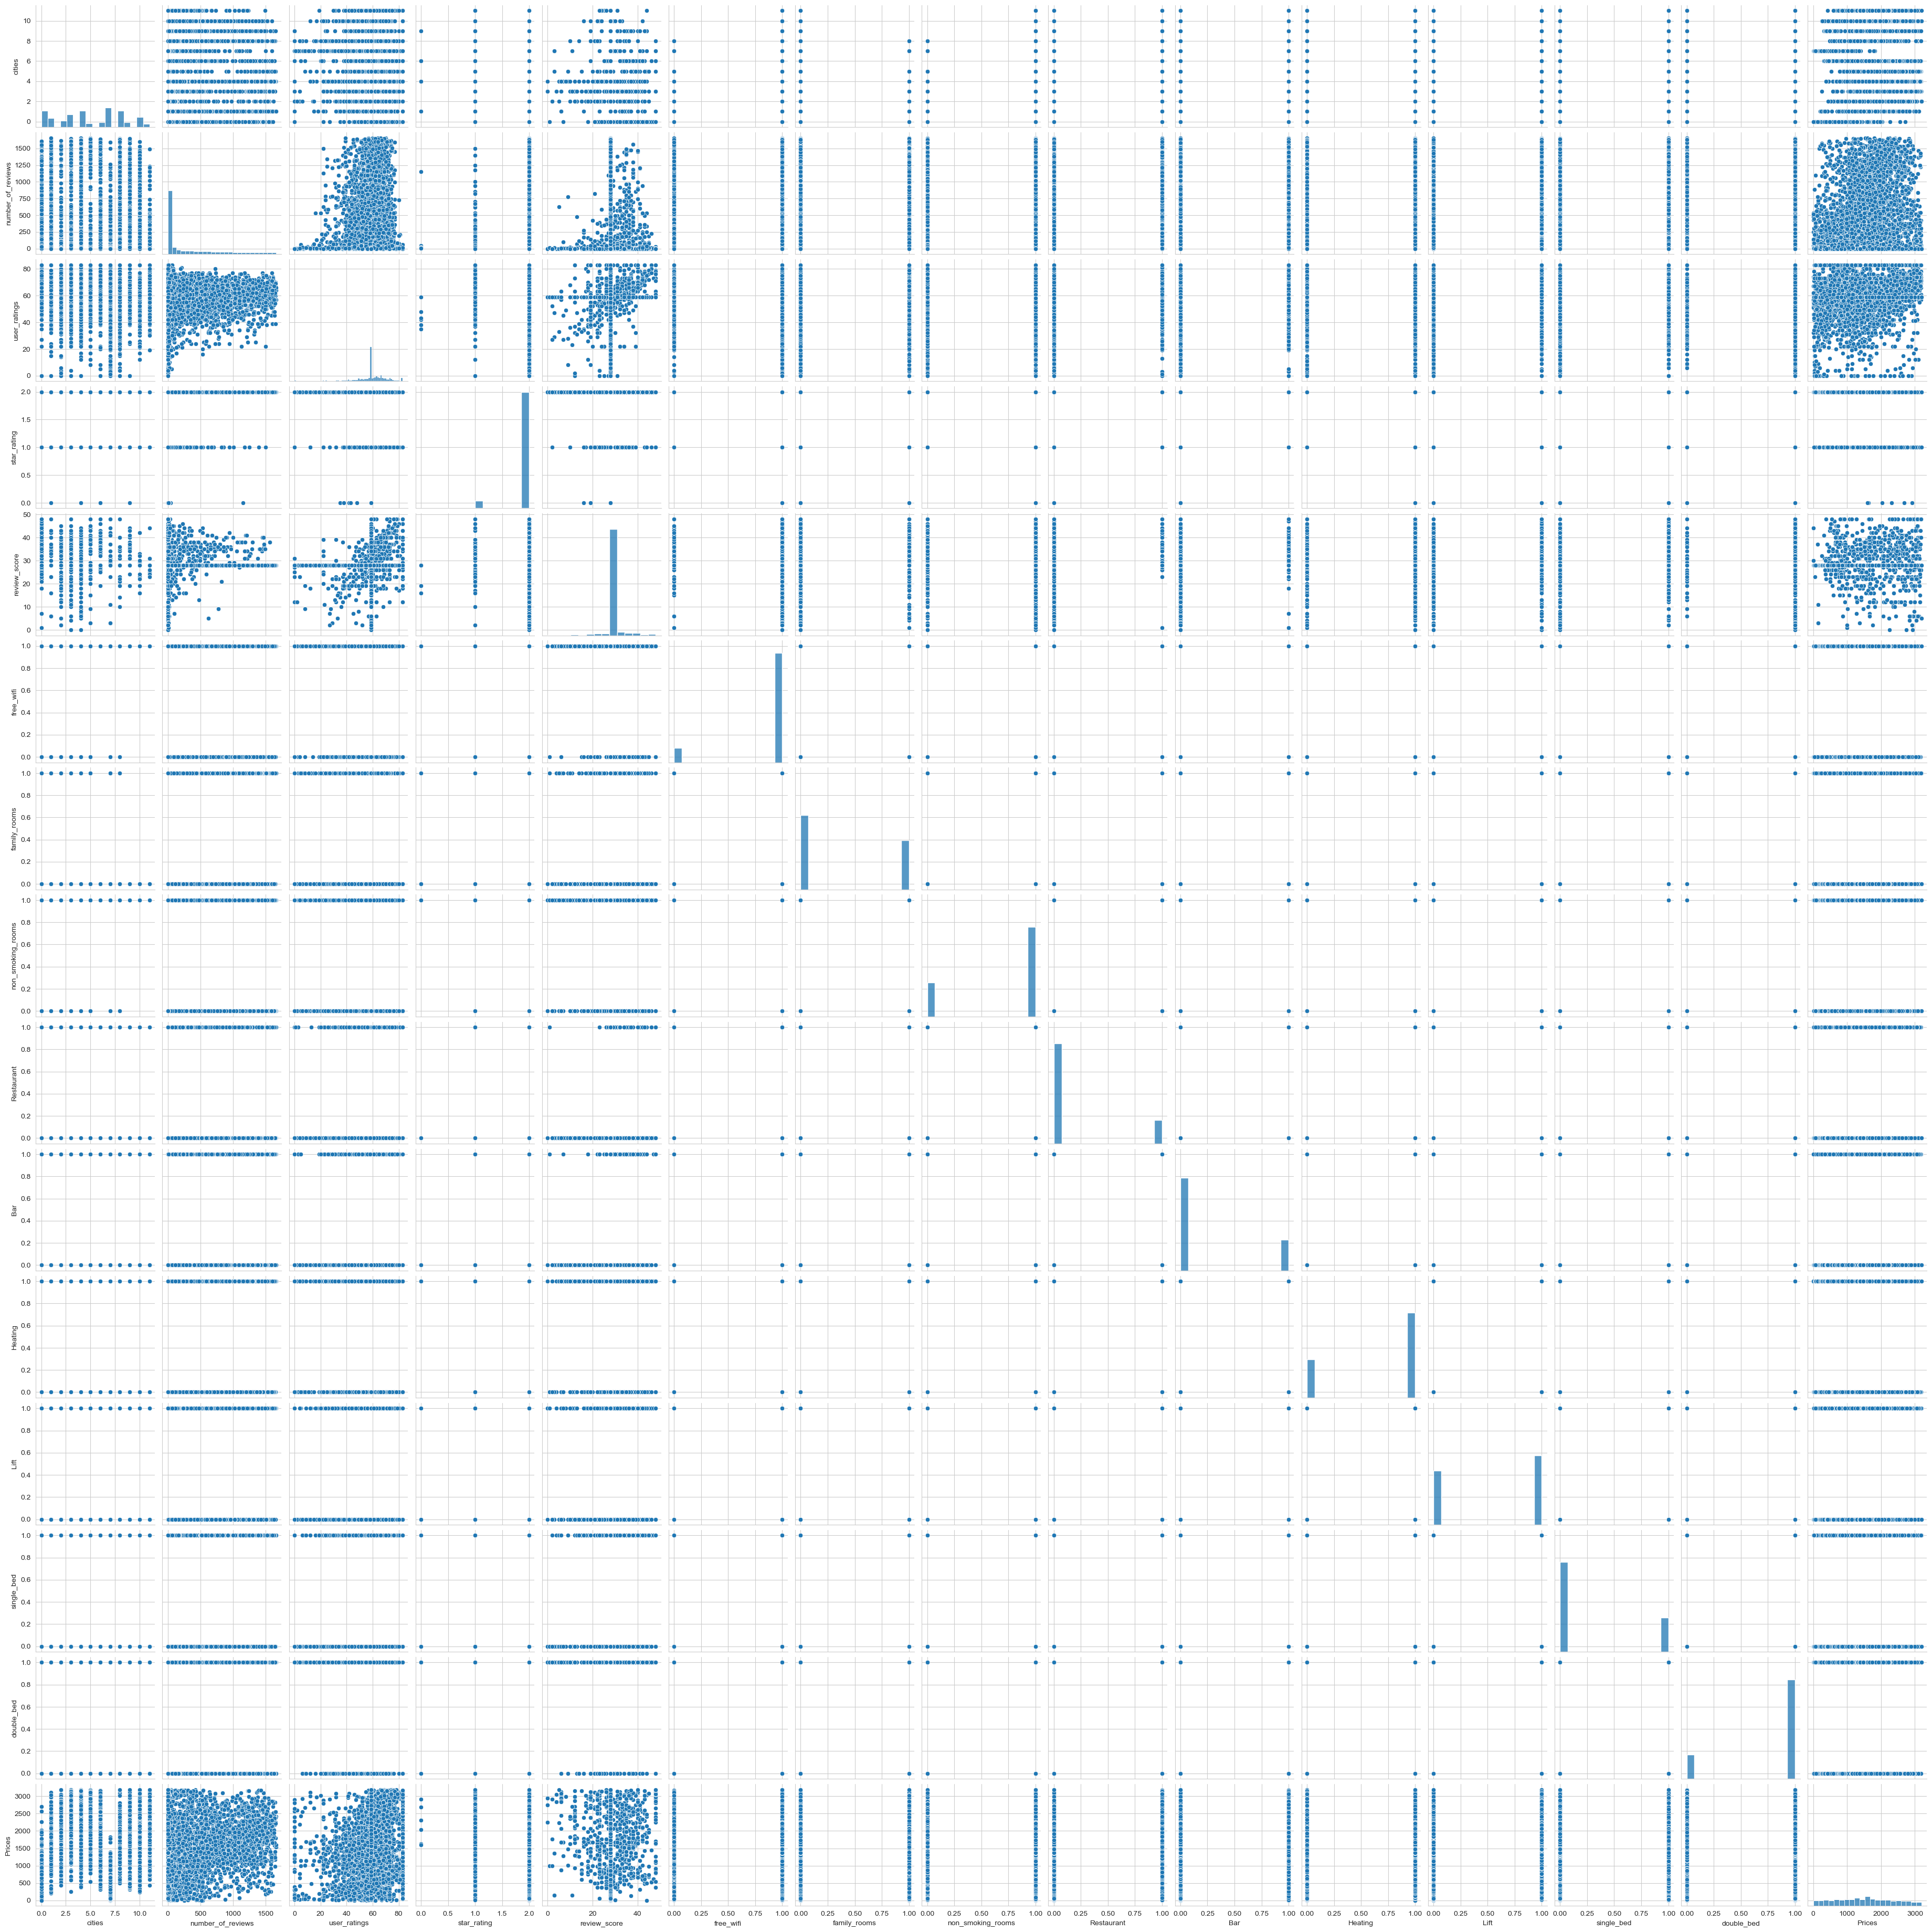

In [59]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.show()

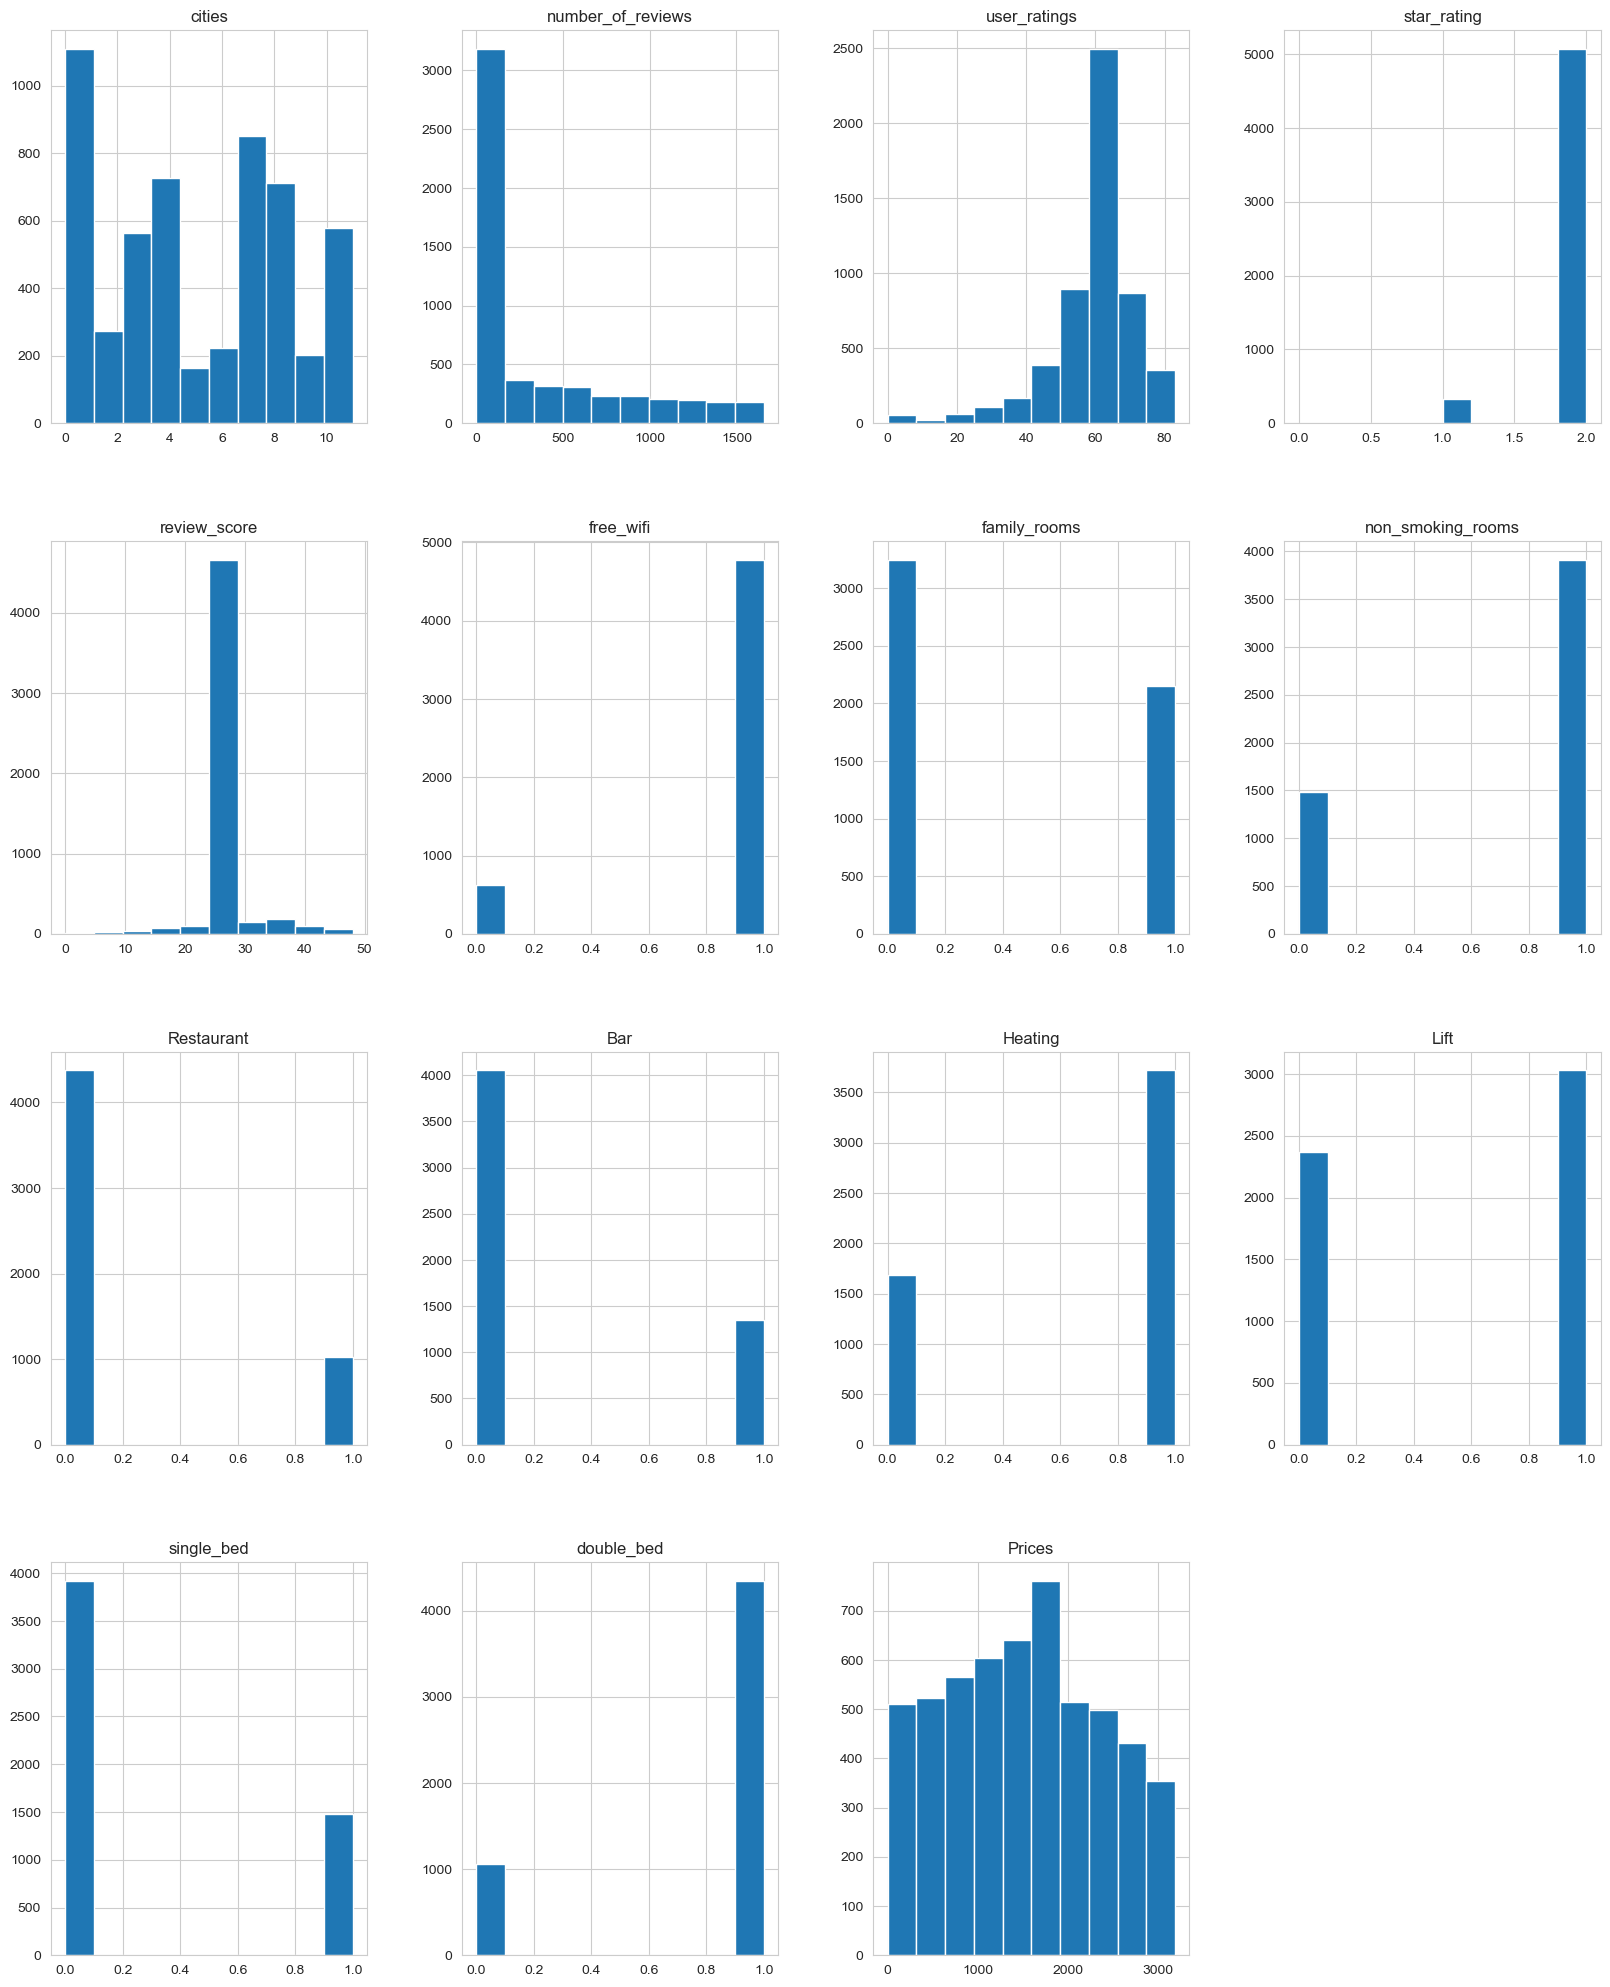

In [60]:
df.hist(figsize=(20,25))
plt.show()

# PHASE - 4

## CASE-1 : Label is Prices

In [61]:
y=df['Prices']

In [62]:
x=df.drop(columns=['Prices'])

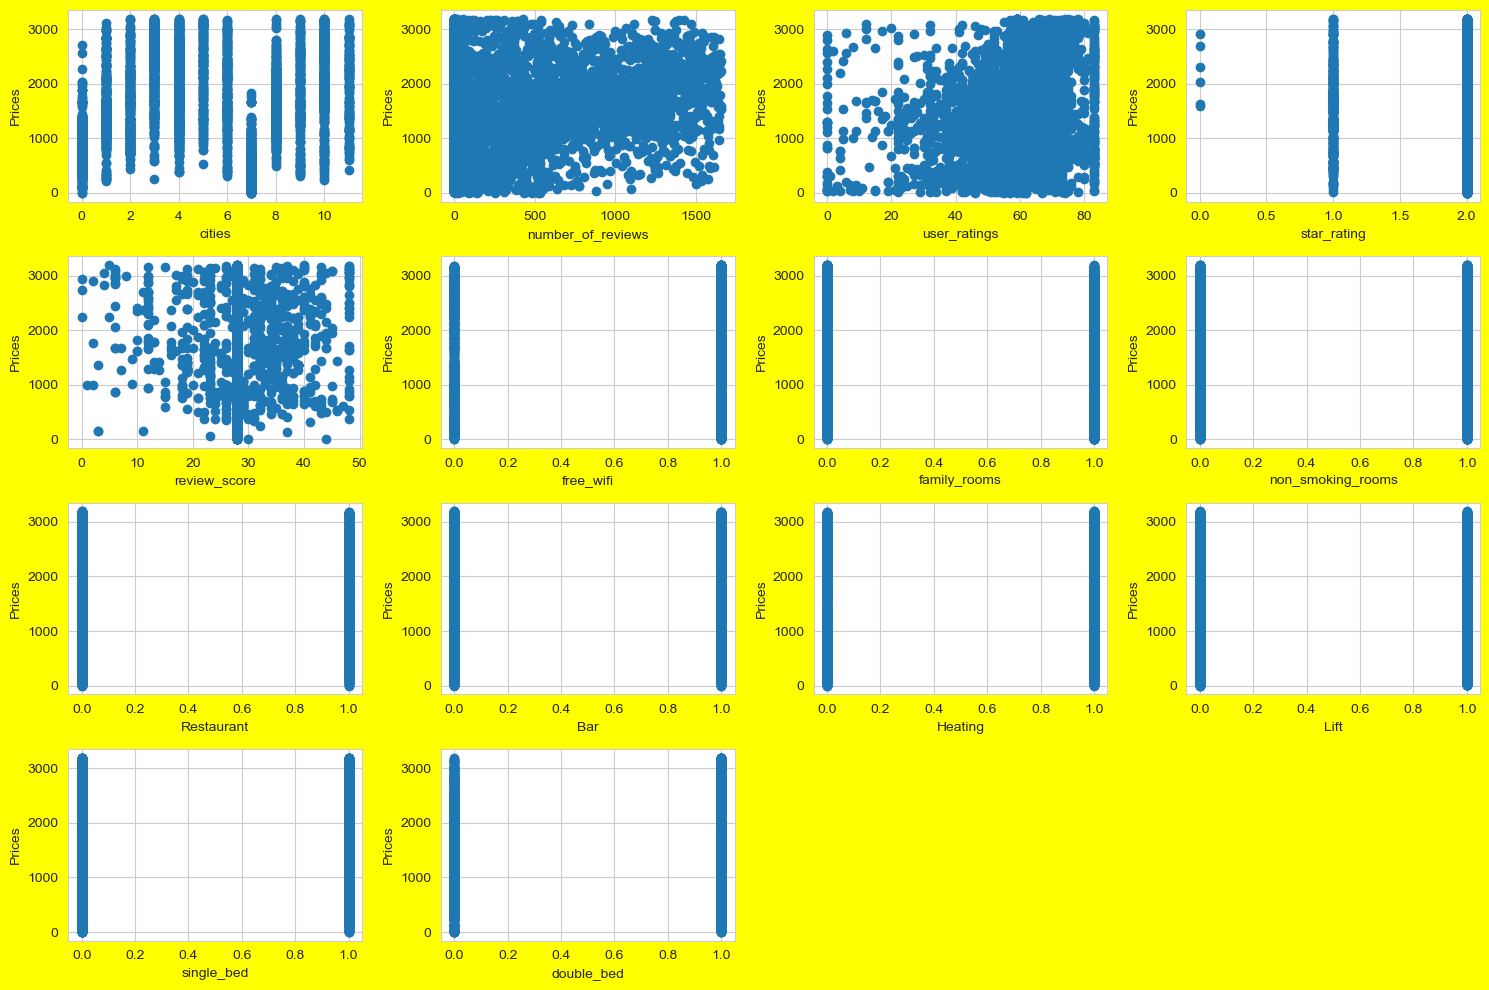

In [63]:
#Visualizing relationship
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Prices',fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Standardization / Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()

In [66]:
x_s=scaler.fit_transform(x)

In [67]:
x_s

array([[-0.60869439, -0.72299264,  0.00471315, ...,  0.8842218 ,
        -0.6153883 ,  0.49310232],
       [-0.60869439, -0.72299264,  0.3227916 , ...,  0.8842218 ,
        -0.6153883 ,  0.49310232],
       [-0.60869439, -0.72299264,  1.11798772, ...,  0.8842218 ,
        -0.6153883 ,  0.49310232],
       ...,
       [ 1.81329808, -0.1232916 , -0.3133653 , ..., -1.13093797,
        -0.6153883 ,  0.49310232],
       [ 1.81329808, -0.23481495, -0.07480647, ..., -1.13093797,
        -0.6153883 ,  0.49310232],
       [ 1.81329808, -0.48311223, -0.63144376, ..., -1.13093797,
        -0.6153883 , -2.02797667]])

## Model building and working with it

In [68]:
# Splitting data
X_train,X_test,y_train,y_test=train_test_split(x_s,y,test_size=0.2,random_state=42)

In [69]:
#LinearRegression Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [70]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 582.2521036179683
MSE: 520608.46200153587
RMSE: 721.5320242383812


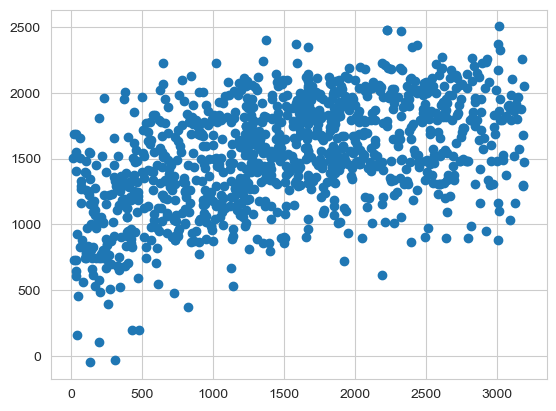

In [71]:

plt.scatter(x=y_test,y=pred)

In [72]:
#DecisionTreeRegressor Model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 384.25644480821774
MSE: 301031.0752027728
RMSE: 548.6629887305802


Text(0, 0.5, 'Predicted Y')

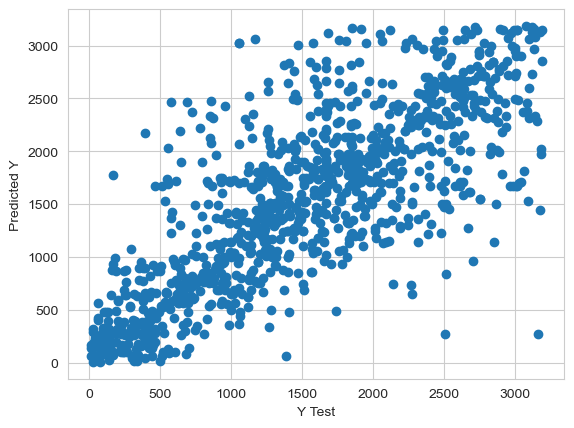

In [74]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [75]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 313.9327988271086
MSE: 186023.93198887652
RMSE: 431.3049176497719


#### Actual vs predicted 

,Y Test,Pred
2476,34,157.615079
1047,2194,1924.925695
3164,1608,1410.993016
2372,842,363.220000
2107,1952,2537.370000


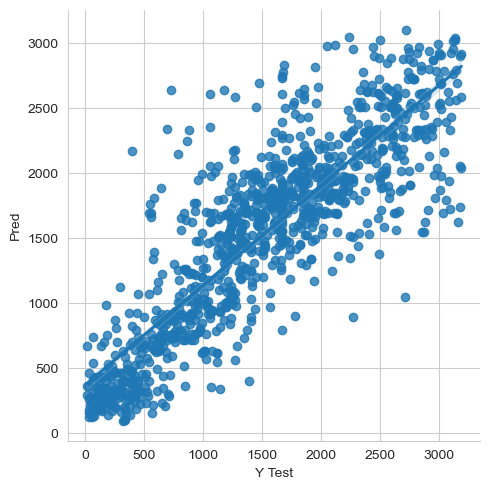

In [77]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

### CASE-2 : Label is Review Score

In [78]:
Y=df['review_score']

In [79]:
X=df.drop(columns=['review_score'])

In [88]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=335)

In [89]:
#function and call as many as times to check accuracy score at different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train :
        y_pred=clf.predict(x_train)
        print('----------------Train Result----------------')
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)}")
    
    if train == False:
        pred=clf.predict(x_test)
        print('----------------Test Result----------------')
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\nTest Classification Report\n',classification_report(y_test,pred,digits=2))

In [90]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [91]:
#Initiate KNeighbors Classifier
knn=KNeighborsClassifier()

In [92]:
#Model training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [93]:
#Call the function and pass dataset to check train and test score
metric_score(knn,x_train,x_test,y_train,y_test,train=True) #Traning score

metric_score(knn,x_train,x_test,y_train,y_test,train=False) #Testing Score

----------------Train Result----------------
Accuracy Score:0.8535440849592492
----------------Test Result----------------
Accuracy Score:84.07%


Test Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         9
          19       0.00      0.00      0.00         5
          21       0.00      0.00      0.00         2
          22  

## Hyperparameter Tuning

In [94]:
#Lets use GridSearchCV for the best parameter to improve the accuracy
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid={'algorithm':['kd_tree','brute']
            ,'leaf_size':[3,5,6,7,8]
           ,'n_neighbors':[3,5,7,9,11,13]}

In [96]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [97]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [98]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 11}

In [99]:
#We will use best parameter in our knn algorith and check if accuracy is increasing
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=3)

In [100]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [101]:
#call the function and pass dataset to check train and test score
metric_score(knn,x_train,x_test,y_train,y_test,train=True) 

metric_score(knn,x_train,x_test,y_train,y_test,train=False) 

----------------Train Result----------------
Accuracy Score:0.8686095332180785
----------------Test Result----------------
Accuracy Score:80.30%


Test Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17  

In [102]:
#Confusion matrix
y_pred=knn.predict(x_test)

In [103]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# BEST MODEL

### ->We found out that best model is KNeighborsClassifier and RandomForestRegressor

##### As we can see for price prediction of hotel every other model was not giving straight line for predicted vs actual value.
##### But RandomForestRegressor was giving the best straight line for predicted vs actual values

##### And for review score prediction of hotel we can see KNeighborsClassifier was giving best accuracy